# Pipeline for Hydra Muscle Modeling

In [1]:
%load_ext autoreload
%autoreload 2

import sys, os, multiprocessing
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))

#import pandas as pd
import modin.pandas as pd

from hydramuscle.model.smc import SMC
from hydramuscle.model.shell import Shell
from hydramuscle.postprocessing.force_encoder_2d import ForceEncoder2D

from hydramuscle.postprocessing.visualizer.save_video_parallel import *
from hydramuscle.postprocessing.visualizer.vlib import *

In [2]:
TOTAL_TIME = 100
TIME_STEP = 0.0002
PARAM_K2 = 0.1
PARAM_S0 = 400
PARAM_D = 40e-4
PARAM_V7 = 0.01
BEHAVIOR = 'contraction burst'
NUMX = 200
NUMY = 200
SAVE_INTERVAL = 50
STIMS_FAST = [1,3,5,7,9,12,15,18,22,26,31,36,42]
STIMS_SLOW = []

PROJECT = "200x200_100s_ele_random_20_conductance"
NUMX = 200
NUMY = 200
TARGETFPS = 400

## Run the model and save calcium data

In [ ]:
model = Shell(SMC(T=TOTAL_TIME, 
                  dt=TIME_STEP, 
                  k2=PARAM_K2, 
                  s0=PARAM_S0, 
                  d=PARAM_D, 
                  v7=PARAM_V7), 
              behavior=BEHAVIOR, 
              numx=NUMX, 
              numy=NUMY,
              save_interval=SAVE_INTERVAL)
sol = model.run(STIMS_FAST, STIMS_SLOW)
c = sol[:,0:model.numx*model.numy]
df = pd.DataFrame(c)
df.to_csv('/media/hengji/DATA/Data/Documents/hydramuscle/results/data/calcium/'+PROJECT+'.csv', 
          index = False)
del sol

 48%|████▊     | 238118/500000 [50:06<1:02:30, 69.82it/s]

## Or... Read data from the .csv file

In [4]:
# SOURCE = "/media/hengji/DATA/Data/Documents/hydramuscle/results/data/calcium/"+PROJECT+".csv"
# c = pd.read_csv(SOURCE).values

In [ ]:
c.shape

## Save the calcium data as frames and video

In [9]:
if not os.path.exists('/media/hengji/DATA/Data/Documents/hydramuscle/results/animations/'+PROJECT+'/frames/'):
    os.makedirs('/media/hengji/DATA/Data/Documents/hydramuscle/results/animations/'+PROJECT+'/frames/')
    os.makedirs('/media/hengji/DATA/Data/Documents/hydramuscle/results/animations/'+PROJECT+'/movie/')

save_frames(c, PROJECT, NUMX, NUMY)
save_video(PROJECT, TARGETFPS)

The number of CPU is:12
saving frames...
saving img3...
saving img8...
saving img0...
saving img7...
saved 8
saving img2...
saving img6...
saved 3
saving img5...
saving img1...
saving img4...
saving img9...
saved 0
saved 2
saved 7
saved 5
saved 6
saved 1
saved 9
saved 4
saving img19...
saving img12...
saving img16...
saving img11...
saving img18...
saved 12
saving img15...
saving img13...
saving img10...
saving img17...
saved 19
saving img14...
saved 16
saved 11
saved 18
saved 13
saved 15
saved 14
saved 10
saved 17
saving img20...
saving img29...
saved 20
saved 29
saving img25...
saving img27...
saving img26...
saving img23...
saving img21...
saving img28...
saving img22...
saving img24...
saved 27
saved 25
saved 28
saved 21
saved 23
saved 26
saved 24
saved 22
saving img32...
saving img38...
saving img31...
saved 32
saving img36...
saving img33...
saved 38
saving img37...
saving img39...
saving img34...
saving img30...
saving img35...
saved 31
saved 36
saved 37
saved 39
saved 33
saved 

100%|██████████| 9990/9990 [00:21<00:00, 464.60it/s]


## Encode Calcium into Force

In [7]:
from hydramuscle.postprocessing.force_encoder_2d import ForceEncoder2D

ENCODE_INTERVAL = TIME_STEP*SAVE_INTERVAL

force = ForceEncoder2D.encode(c, NUMX, NUMY, ENCODE_INTERVAL)
df = pd.DataFrame(force)
df.to_csv('/media/hengji/DATA/Data/Documents/hydramuscle/results/data/force/'+PROJECT+'.csv')

100%|██████████| 10000/10000 [01:23<00:00, 119.54it/s]


In [8]:
force.shape

(10000, 40000)

## Visualize specified frames

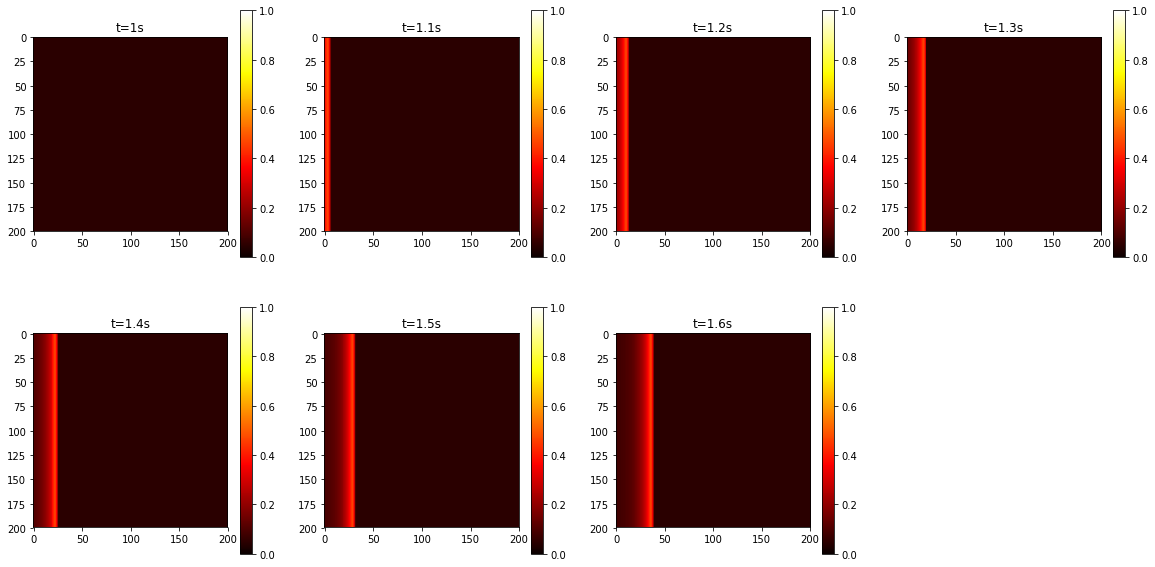

In [21]:
# TIME_LIST = [t for t in STIMS_FAST[:8]]
TIME_LIST = [1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]
plot_frames(c, NUMX, NUMY, TIME_LIST, TIME_STEP*SAVE_INTERVAL, 0, 1)

## Visualize the trace of specified points

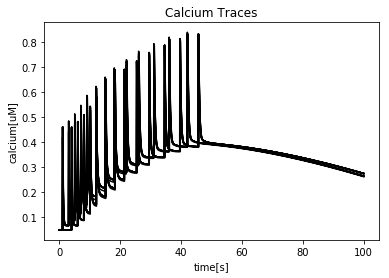

In [27]:
I_X = 0
I_Y = 10

index = I_X*NUMX + I_Y
save_curve(x=c[:,9990:10010],
           dt=TIME_STEP*SAVE_INTERVAL,
           xlabel="time[s]",
           ylabel="calcium[uM]",
           title="Calcium Traces",
           filename=None,
           show=True, 
           save=False)

## Visualize the average trace over time

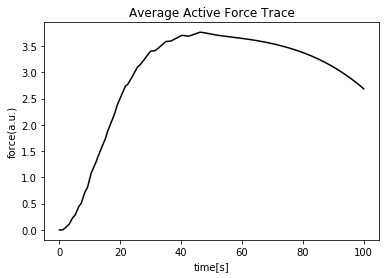

In [25]:
save_curve(x=np.mean(force, axis=1),
           dt=TIME_STEP*SAVE_INTERVAL,
           xlabel="time[s]",
           ylabel="force(a.u.)",
           title="Average Active Force Trace",
           filename=None,
           show=True, 
           save=False)